In [1]:
#importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leemos datos de archivo
#Fuente
data1 = pd.read_csv('dataaxa2.csv')
data1.head()
#Pintamos data

,CAUSA SINIESTRO,TIPO VEHICULO,NIVEL Daño VEHICULO,PUNTO DE IMPACTO,MES,Daño NUMERO,DIA,HORA,ESTADO,CIUDAD,...,VOLCADURA,PERDIDA TOTAL,CONDUCTOR DISTRAIDO,FUGA,ALCOHOL,MOTOCICLETA,BICICLETA,SEGURO,TAXI,ANIMAL
0,COLISION Y/O VUELCO,Auto,Bajo,Trasero,ENERO,1,LUNES,3,GUERRERO,ACAPULCO DE JUAREZ,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,COLISION Y/O VUELCO,Auto,Bajo,Frontal,ENERO,1,LUNES,10,GUERRERO,ACAPULCO DE JUAREZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,COLISION Y/O VUELCO,Auto,Bajo,Frontal,ENERO,1,LUNES,11,GUERRERO,ZIHUATANEJO DE AZUETA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,COLISION Y/O VUELCO,Auto,Bajo,Costado izq central,ENERO,1,LUNES,11,GUERRERO,ZIHUATANEJO DE AZUETA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COLISION Y/O VUELCO,Auto,Bajo,Trasero,ENERO,1,LUNES,11,GUERRERO,CHILPANCINGO DE LOS BRAVO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Eliminamos datos vacios de nuestras variables a usar 
data2=data1.dropna(subset=['CAUSA SINIESTRO', 'TIPO VEHICULO', 'NIVEL Daño VEHICULO', 'PUNTO DE IMPACTO' ])

In [4]:
data2["HOSPITALIZADO"].value_counts()
#pd.value_counts(data1['CAUSA SINIESTRO']).plot.bar()
#pd.value_counts(data1['TIPO VEHICULO']).plot.bar()
#pd.value_counts(data1['NIVEL Daño VEHICULO']).plot.bar()
#pd.value_counts(data1['PUNTO DE IMPACTO']).plot.bar()

NO    145438
SI     13659
Name: HOSPITALIZADO, dtype: int64

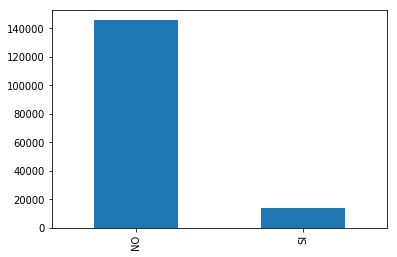

In [5]:
pd.value_counts(data2['HOSPITALIZADO']).plot.bar()

In [6]:
#Para reemplazar Si y no en la columna de hospitalización
nums = {"HOSPITALIZADO": {"SI": 1, "NO": 0, }}

In [7]:
#Reemplazamos por números 
data2.replace(nums, inplace=True)

C:\Users\MB87505\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [8]:
df_majority = data2[data2.HOSPITALIZADO==0]
df_minority = data2[data2.HOSPITALIZADO==1]

In [9]:
from sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=145438,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data2 = pd.concat([df_majority, df_minority_upsampled])

In [10]:
# Display new class counts
data2.HOSPITALIZADO.value_counts()

1    145438
0    145438
Name: HOSPITALIZADO, dtype: int64

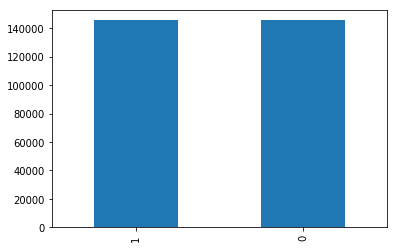

In [11]:
pd.value_counts(data2['HOSPITALIZADO']).plot.bar()

In [12]:
#conversión de respuestas de columnas a binario
data = pd.get_dummies(data2)
data.head()

,Daño NUMERO,HORA,LESIONADOS,EDAD LESIONADO,HOSPITALIZADO,AMBULANCIA,ARBOL,PIEDRA,DORMIDO,GRUA,...,GENERO LESIONADO_F,GENERO LESIONADO_Indefinido,GENERO LESIONADO_M,NIVEL LESIONADO_ALTO,NIVEL LESIONADO_BAJO,NIVEL LESIONADO_MEDIO,NIVEL LESIONADO_\N,FALLECIDO_NO,FALLECIDO_SI,FALLECIDO_\N
0,1,3,0,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,1
1,1,10,0,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,1
2,1,11,0,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,1
3,1,11,0,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,1
4,1,11,0,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,1


In [13]:
x=data.iloc[:,23:49]
x.head()

,CAUSA SINIESTRO_ATROPELLO,CAUSA SINIESTRO_COLISION Y/O VUELCO,CAUSA SINIESTRO_DANOS POR LA CARGA,CAUSA SINIESTRO_FENOMENOS DE LA NATURALEZA,CAUSA SINIESTRO_HUELGAS Y ALBOROTOS,CAUSA SINIESTRO_INCENDIO RAYO O EXPLOSION,CAUSA SINIESTRO_TRANSPORTACION,TIPO VEHICULO_Auto,TIPO VEHICULO_Camion,TIPO VEHICULO_Camion Ligero,...,PUNTO DE IMPACTO_Costado der central,PUNTO DE IMPACTO_Costado der delantero,PUNTO DE IMPACTO_Costado der trasero,PUNTO DE IMPACTO_Costado izq central,PUNTO DE IMPACTO_Costado izq delantero,PUNTO DE IMPACTO_Costado izq trasero,PUNTO DE IMPACTO_Frontal,PUNTO DE IMPACTO_Parte baja,PUNTO DE IMPACTO_Tapa cajuela,PUNTO DE IMPACTO_Toldo
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y = data.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

Luego, dividimos los datos en variables dependientes e independientes, así como un conjunto de capacitación y validación para evaluar posteriormente los resultados de nuestro modelo.

## RandomForestRegressor

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

In [16]:
#tamaño de datos
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((232700, 26), (58176, 26), (232700,), (58176,))

In [17]:
def rmse(x,y): return np.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(x_train), y_train), 
           rmse(m.predict(x_test), y_test),
           m.score(x_train, y_train), 
           m.score(x_test, y_test)]
    
    if hasattr(m, 'oob_score_'):res.append(m.oob_score_)
    print (res)

In [18]:
from sklearn.ensemble import RandomForestRegressor
m = RandomForestRegressor(n_estimators=50)
m.fit(x_train, y_train)
print_score(m)
#RMSE Train:
#RMSE Valid: 
#Accuracy Train:
#Accuracy Valid: 

[0.45181386115855154, 0.45234402314168726, 0.18345529730148102, 0.18151320278886196]


# Fin

## RandomForest

In [19]:
# Importamos el algoritmo
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf=RandomForestClassifier(n_estimators=100) # Cuantos árboles queremos que entrene

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))  

0.6824119911991199
[[20080  8843]
 [ 9633 19620]]


### El resultado nos dice que tenemos 20080 + 19620 predicciones correctas y 9633 + 8843 predicciones incorrectas.

In [22]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.68      0.69      0.68     28923
           1       0.69      0.67      0.68     29253

   micro avg       0.68      0.68      0.68     58176
   macro avg       0.68      0.68      0.68     58176
weighted avg       0.68      0.68      0.68     58176



# Fin

## LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\MB87505\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[29266 14451]
 [13284 30262]]


### El resultado nos dice que tenemos 29266 + 30262 predicciones correctas y 13284 + 14451 predicciones incorrectas.

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68     43717
           1       0.68      0.69      0.69     43546

   micro avg       0.68      0.68      0.68     87263
   macro avg       0.68      0.68      0.68     87263
weighted avg       0.68      0.68      0.68     87263



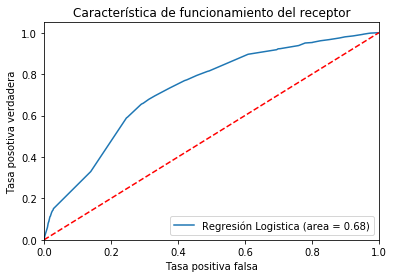

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logistica (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa positiva falsa')
plt.ylabel('Tasa posotiva verdadera')
plt.title('Característica de funcionamiento del receptor')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Una curva característica de funcionamiento del receptor, o curva ROC, es un gráfico que ilustra la capacidad de diagnóstico de un sistema de clasificador binario a medida que varía su umbral de discriminación.

# Fin

-------------------------